# Simulating Dice Rolls

I want to investigate how to simulate dice rolls and use Matplotlib to plot the frequencies as histograms.

The first function will simulate rolling _x_ number of dice with _d_ faces. This will be repeated _n_ times.

The second function will simulate two sets of dice _n_ numbers of times. The first set has _x1_ dice with _d1_ faces. The second set has _x2_ dice with _d2_ faces. 

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import re
import math

In [135]:
def roll_dice(x, d):
    """
    Function to simulate rolling x fair dice with d number of faces
    """
    roll = 0
    for i in range(x):
        roll += np.random.randint(1, d + 1)
    return roll

def simulate_dice_rolls(n, x, d):
    """This function simulates n dice rolls, for x number of dice, with d number of faces."""
    results = []
    for i in range(n):
        results.append(roll_dice(x, d))
    results = np.asarray(results)
    return results
    

In [264]:
n = 1000000
x = 1
d = 20
max_roll = x * d

results = simulate_dice_rolls(n, x, d)

In [265]:
for i in range(x, max_roll + 1):
    print(i, np.sum(results == i))

1 50168
2 49883
3 50116
4 50371
5 50122
6 49908
7 49845
8 50004
9 50112
10 49911
11 50025
12 49651
13 49960
14 50150
15 49740
16 49931
17 50013
18 50228
19 49991
20 49871


Text(0.5, 1.0, 'Single set of dice rolls simulated')

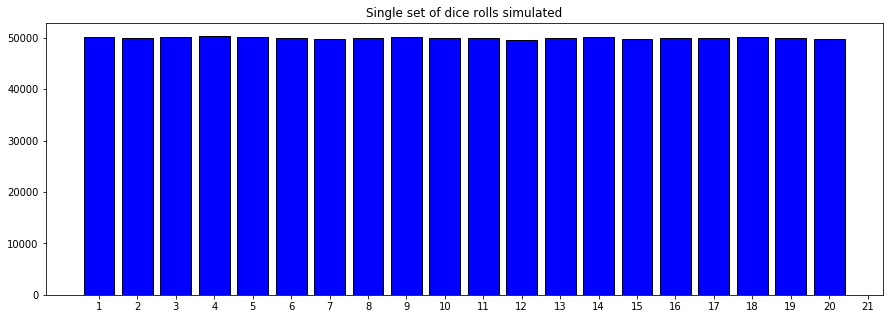

In [266]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.hist(results, bins = np.arange(x, max_roll + 2) - 0.5, histtype = 'bar', 
         rwidth=0.8, facecolor = 'blue', edgecolor="k")
plt.xticks(np.arange(x, max_roll + 2))
plt.title('Single set of dice rolls simulated')

In [261]:
results.sort()
mean = np.mean(results)
print(mean)

17.4934


In [262]:
std = np.std(results)
print(std)

3.819873877499099


Text(0.5, 1.0, 'Single set of dice rolls simulated')

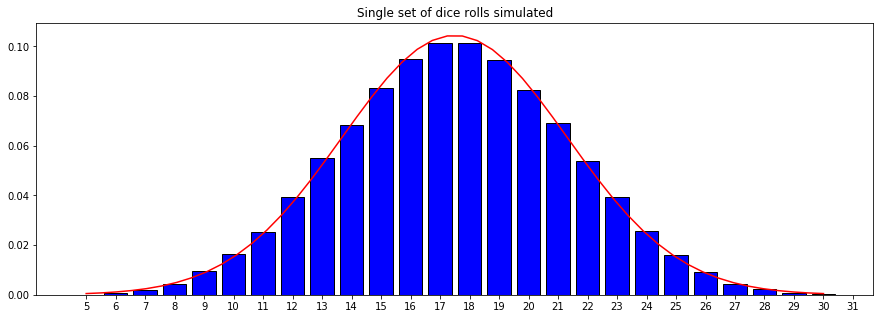

In [263]:
x_range = np.linspace(x, max_roll)
pdf = stats.norm.pdf(x_range, mean, std)
plt.plot(x_range, pdf, color = 'red')
plt.hist(results, bins = np.arange(x, max_roll + 2) - 0.5, histtype = 'bar', 
         rwidth=0.8, facecolor = 'blue', edgecolor="k", density=True)
plt.xticks(np.arange(x, max_roll + 2))
plt.title('Single set of dice rolls simulated')


## Roll two different sets of dice simultaneously

In [8]:
def simulate_two_sets_dice_rolls(n, x1, d1, x2, d2):
    """This simulates rolling two different sets of dice (with xi dnumber of dice with di number of faces) n times"""
    roll_1 = []
    roll_2 = []
    for i in range(n):
        roll_1.append(roll_dice(x1, d1))
        roll_1_arr = np.asarray(roll_1)
        roll_2.append(roll_dice(x2, d2))
        roll_2_arr = np.asarray(roll_2)
        
    results_2 = roll_1_arr + roll_2_arr
    return results_2


In [18]:
n = 10000
x1 = 2
d1 = 6
x2 = 2
d2 = 6
min_roll = x1 + x2
max_roll_2 = (x1 * d1) + (x2 * d2)

results_2 = simulate_two_sets_dice_rolls(n, x1, d1, x2, d2)

Text(0.5, 1.0, 'Two sets of dice rolls simulated')

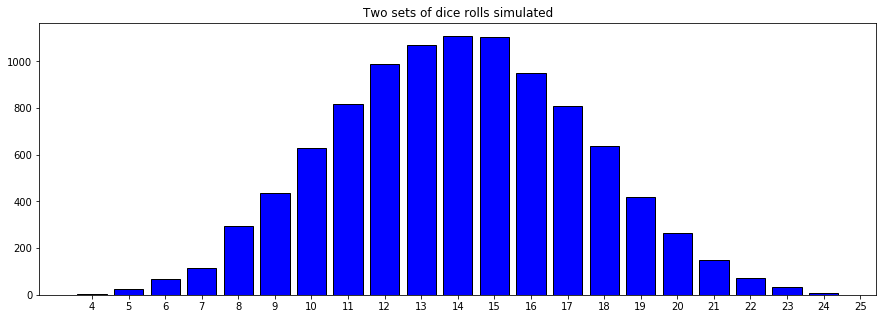

In [45]:
plt.hist(results_2, bins = np.arange(min_roll, max_roll_2 + 2) - 0.5, histtype = 'bar', 
         rwidth=0.8, facecolor = 'blue', edgecolor="k")
plt.xticks(np.arange(min_roll, max_roll_2 + 2))
plt.title('Two sets of dice rolls simulated')

Text(0.5, 1.0, 'Two sets of dice rolls simulated')

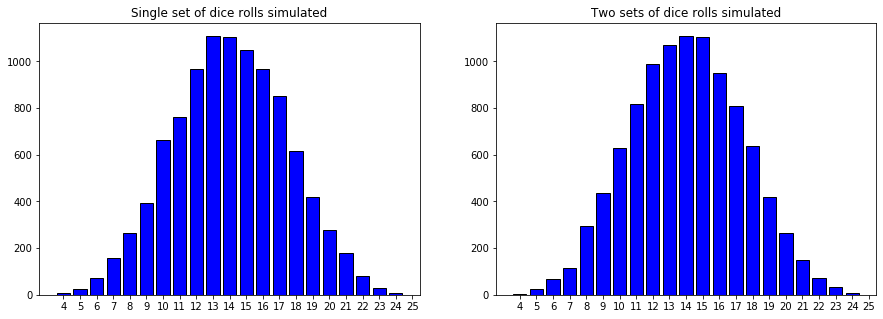

In [46]:
# Plotting together
plt.subplot(121)
plt.hist(results, bins = np.arange(x, max_roll + 2) - 0.5, histtype = 'bar', 
         rwidth=0.8, facecolor = 'blue', edgecolor="k")
plt.xticks(np.arange(x, max_roll + 2))
plt.title('Single set of dice rolls simulated')

plt.subplot(122)
plt.hist(results_2, bins = np.arange(min_roll, max_roll_2 + 2) - 0.5, histtype = 'bar', 
         rwidth=0.8, facecolor = 'blue', edgecolor="k")
plt.xticks(np.arange(min_roll, max_roll_2 + 2))
plt.title('Two sets of dice rolls simulated')

# Individual dice rolls

The following is working out how to write a class that can be used to roll dice with and without a modifier. Functions can then be used to parse a string into values of x and d for dice rolls. 

In [91]:
class dice:
    
    def __init__(self, x, d, m=0):
        self.x = x
        self.d = d
        self.m = m
    
    def roll_dice(self):
        roll = 0
        for i in range(self.x):
            roll += np.random.randint(1, self.d + 1)
        return roll + self.m
        
    def roll_dice_multi(self, n):
        self.n = n 
        rolls = []
        for j in range(self.n):
            roll = 0
            for i in range(self.x):
                roll += np.random.randint(1, self.d + 1)
                roll = roll + self.m
            rolls.append(roll)
        return rolls
        

In [94]:
r1 = dice(2, 6, 3)
r1.roll_dice_multi(5)

[15, 12, 16, 13, 12]

### Take string input for dice rolls
I want to be able to convert a string in the form '2d4 + 5' to lead to a dice rolls. For example '2d4 + 5' would lead to the following to run:
```python
r = dice(2, 4)
r.roll_add_mod(5)
```

In [34]:
string = "2d4 + 5"
# can get first and third characters using slicing

x = int(string[0])
d = int(string[2])
print(f"x is {x}")
print(f"d is {d}")

r = dice(x, d)
r.roll_dice()

x is 2
d is 4


4

The position of the modifier value in the string is variable. The best way to access this is to choose the last value. We do this with a negative index.

In [36]:
m = int(string[-1])
print(f"m is {m}")

m is 5


In [53]:
# we can write a new function which can handle a sting input for dice by parsing values for x, d and m

def roll_dice_from_string(string):
    x = int(string[0])
    d = int(string[2])
    r = dice(x, d)
    if '+' in string:
        m = int(string[-1])
        print("'{}D{} + {}' rolled".format(x, d, m))
        return r.roll_add_mod(m)
    else:
        print("'{}D{}' rolled".format(x, d))
        return r.roll_dice()
        

In [56]:
roll_dice_from_string("4D3+  2")

'4D3 + 2' rolled


14

The problem with the above is it only works if the values for x, d and m are single digit values. To take multiple digit values the above must be changed to use D and + as delimiters.

In [78]:
# Split string on d character
string = "2d6 + 6"
string = string.replace(' ', '')
print(string)
roll_elements = re.split('[d, D, +,]', string)

2d6+6


We can redefine the roll from string function so that it takes x, d and m if applicable from the resulting list:



In [84]:
def roll_dice_from_string(string):
    string = string.replace(' ', '')
    print(string)
    roll_elements = re.split('[d, D, +,]', string)
    x = int(roll_elements[0])
    d = int(roll_elements[1])
    r = dice(x, d)
    if len(roll_elements) == 3:
        m = int(roll_elements[2])
        print("'{}D{} + {}' rolled".format(x, d, m))
        return r.roll_add_mod(m)
    else:
        print("'{}D{}' rolled".format(x, d))
        return r.roll_dice()
        

In [85]:
roll_dice_from_string("2d20 + 3")

2d20+3
'2D20 + 3' rolled


26

### Take comma seperated list of rolls as input

In [91]:
rolls = "2d4 + 2, 3d6 + 4, 3D2, 2d20"
rolls_split = rolls.split(',')
print(rolls_split)

['2d4 + 2', ' 3d6 + 4', ' 3D2', ' 2d20']


In [95]:
rolls_list = []
for rolls in rolls_split:
    rolls = rolls.replace(' ', '')
    rolls = re.split('[d, D, +,]', rolls)
    rolls_list.append(rolls)
print (rolls_list)


[['2', '4', '2'], ['3', '6', '4'], ['3', '2'], ['2', '20']]


Next the list elements should all be the same length.
    


Bringing this together ina function:

In [133]:
def roll_dice_from_string_multi(string):
    rolls_list = []
    rolls_split = string.split(',')
    
    for rolls in rolls_split:
        rolls = rolls.replace(' ', '')
        rolls = re.split('[d, D, +,]', rolls)
        rolls_list.append(rolls)
          
    i = 0
    for roll in rolls_list:
        i += 1
        x = roll[0]
        d = roll[1]
        
        if len(roll) == 2:
            print("dice roll {} is '{}D{}'".format(i, x, d))
        else:
            m = roll[2]
            print("dice roll {} is '{}D{} + {}'".format(i, x, d, m))
    print(f"Number of rolls: {i}")

In [134]:
roll_dice_from_string_multi("2d20, 2D8 + 2, 2d6+4")

dice roll 1 is '2D20'
dice roll 2 is '2D8 + 2'
dice roll 3 is '2D6 + 4'
Number of rolls: 3


In [21]:
x = 2
d = 6
m = 5

min_roll = x + m
max_roll = (x * d) + m
print(min_roll)
print(max_roll)
mean = (x * (d + 1) / 2) + m
std = math.sqrt(x * (d ** 2 - 1)/ 12)
x_range = np.linspace(min_roll, max_roll)
print(mean)
print(std)

7
17
12.0
2.41522945769824


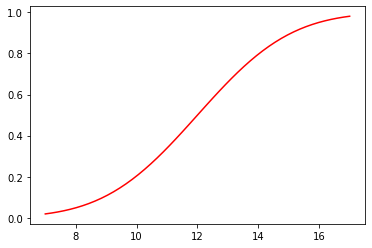

In [25]:
cdf = stats.norm.cdf(x_range, mean, std)

plt.plot(x_range, cdf, color = 'red')

In [28]:
stats.norm(mean, std).cdf(16)

0.9511550203269216

In [95]:
dice?